In [2]:
import pandas as pd

df = pd.read_csv('CounterProductiveData.csv')
df = df[df.columns[:-2]]
df.head()

,description,Personal attacks,Threats or intimidation,Mockery,Lack of specificity,Discouragement without guide,Disregard for other time or boundaries,Unconscious bias,Dismissive attitude,Excessive control
0,/It may happen that a service die/A service ma...,0,0,0,1,0,0,0,0,0
1,"@zhiyan, thanks for helping explanation. Overa...",0,0,0,0,0,0,0,0,0
2,all the code you have inline below should be r...,0,0,0,0,0,0,0,0,0
3,All you do in the interrupt handler is call wa...,1,0,1,1,0,1,0,0,0
4,Are you sure this leads to a color that makes ...,0,0,0,0,0,0,0,0,0


A one-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

If the overall p-value from the ANOVA table is less than some significance level, then we have sufficient evidence to say that at least one of the means of the groups is different from the others.

However, this doesn’t tell us which groups are different from each other. It simply tells us that not all of the group means are equal. In order to find out exactly which groups are different from each other, we must conduct a post hoc test.

One of the most commonly used post hoc tests is Tukey’s Test, which allows us to make pairwise comparisons between the means of each group while controlling for the family-wise error rate.

In [3]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(
    df['Personal attacks'],
    df['Threats or intimidation'],
    df['Mockery'],
    df['Lack of specificity'],
    df['Discouragement without guide'],
    df['Disregard for other time or boundaries'],
    df['Unconscious bias'],
    df['Dismissive attitude'],
    df['Excessive control']
)

print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 1.6124014767201511e-47


We can see that the overall p-value from the ANOVA table is 0.01258.

Since this is less than .05, we have sufficient evidence to say that the mean values across each group are not equal.

Thus, we can proceed to perform Tukey’s Test to determine exactly which group means are different.

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df2=df.drop(columns=['description'])
# Perform Tukey's HSD test
# Flatten the data for Tukey's HSD
data = df2.melt(var_name='Category', value_name='Score')

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Score'], data['Category'])
print(tukey_result)


                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
                group1                                 group2                 meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------
          Discouragement without guide                    Dismissive attitude     -0.1 0.0014 -0.1756 -0.0244   True
          Discouragement without guide Disregard for other time or boundaries  -0.1548    0.0 -0.2304 -0.0793   True
          Discouragement without guide                      Excessive control  -0.1452    0.0 -0.2207 -0.0696   True
          Discouragement without guide                    Lack of specificity   0.1226    0.0   0.047  0.1982   True
          Discouragement without guide                                Mockery  -0.0645 0.1669 -0.1401  0.0111  False
          Discouragement without guide                       Per

/var/folders/wv/p256rvnn78bd_8sv0_20lz4m0000gn/T/ipykernel_10878/4211113922.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Category', y='Score', data=data, ci='sd', capsize=0.1, errwidth=2)
/var/folders/wv/p256rvnn78bd_8sv0_20lz4m0000gn/T/ipykernel_10878/4211113922.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x='Category', y='Score', data=data, ci='sd', capsize=0.1, errwidth=2)


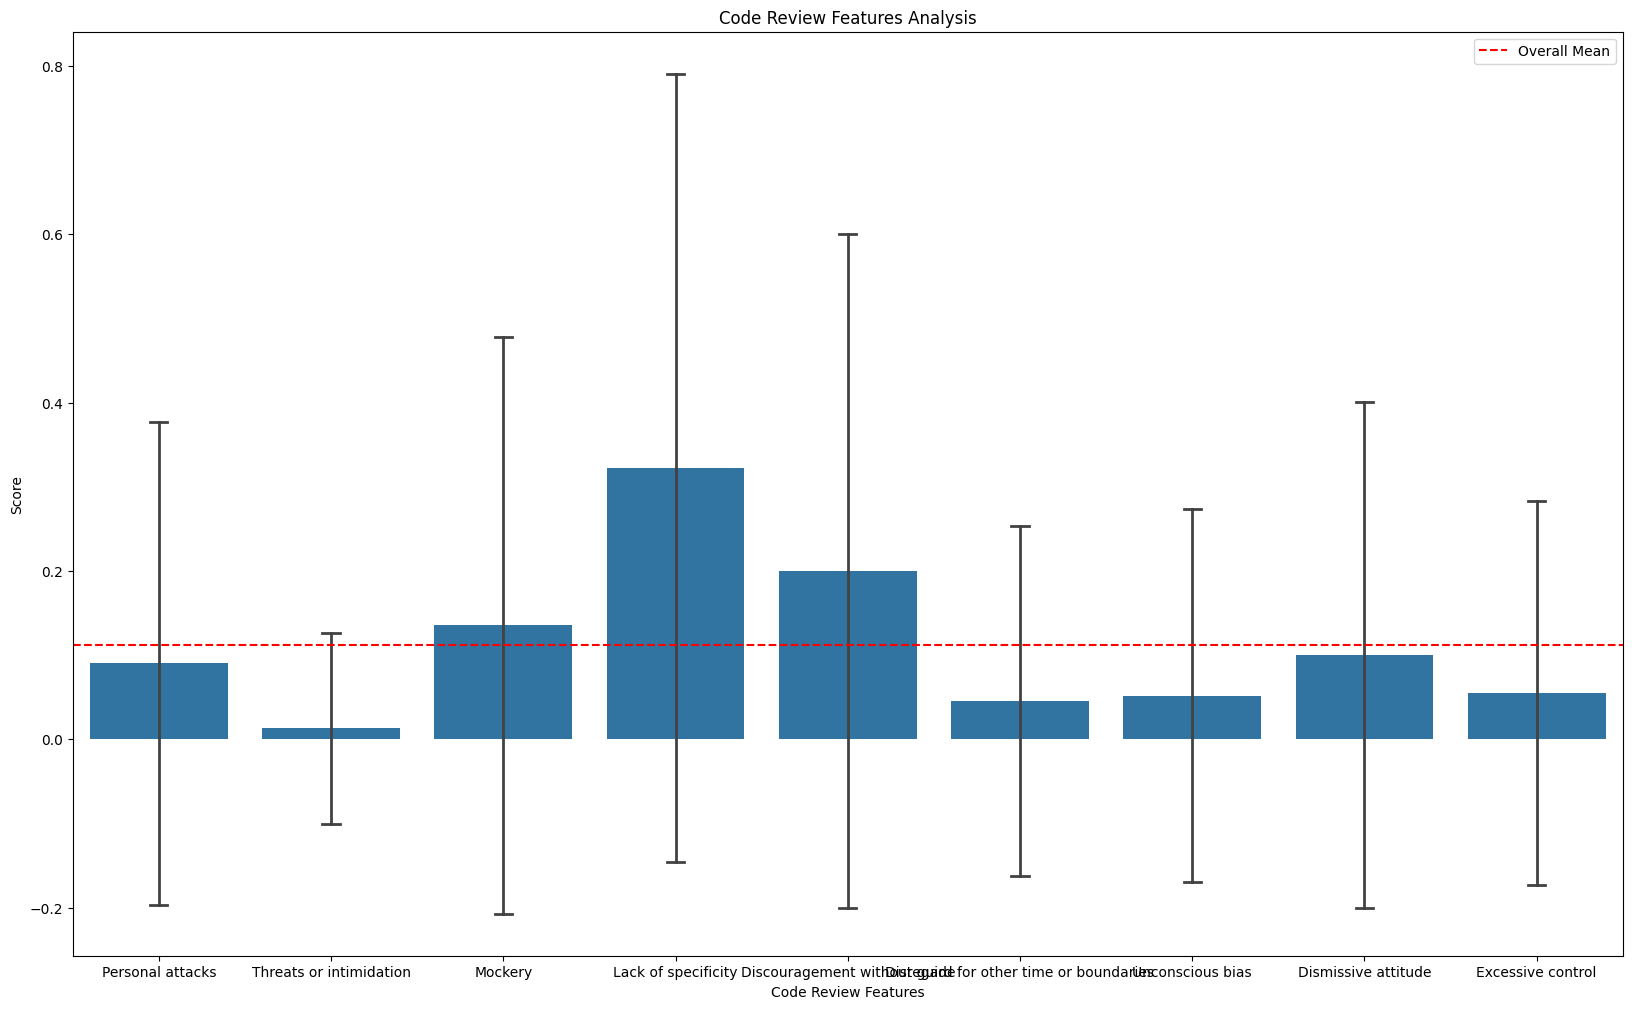

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(20, 12))

# Plot means with confidence intervals
sns.barplot(x='Category', y='Score', data=data, ci='sd', capsize=0.1, errwidth=2)

# Adding horizontal line for the overall mean
overall_mean = data['Score'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean')

plt.title('Code Review Features Analysis')
plt.xlabel('Code Review Features')
plt.ylabel('Score')
plt.legend()
plt.show()

In [10]:
import pandas as pd

# Define the data
featureRelData = pd.read_csv('hsdResult.csv')
featureRelData.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Discouragement without guide,Dismissive attitude,-0.1030,0.0012,-0.1801,-0.0259,True
1,Discouragement without guide,Disregard for other time or boundaries,-0.1595,0.0000,-0.2366,-0.0824,True
2,Discouragement without guide,Excessive control,-0.1495,0.0000,-0.2266,-0.0724,True
3,Discouragement without guide,Lack of specificity,0.0963,0.0034,0.0193,0.1734,True
4,Discouragement without guide,Mockery,-0.0664,0.1569,-0.1435,0.0106,False


I want to draw an undirected graph. nodes are the features  and each node have edge to another one if the reject is false

In [9]:
import pandas as pd

# Convert Tukey HSD result to DataFrame
tukey_df = pd.DataFrame(
    data=tukey_result.summary().data[1:],   # skip header row
    columns=tukey_result.summary().data[0]  # header
)

#print(tukey_df)
featureRelData = tukey_df
featureRelData

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Discouragement without guide,Dismissive attitude,-0.1000,0.0014,-0.1756,-0.0244,True
1,Discouragement without guide,Disregard for other time or boundaries,-0.1548,0.0000,-0.2304,-0.0793,True
2,Discouragement without guide,Excessive control,-0.1452,0.0000,-0.2207,-0.0696,True
3,Discouragement without guide,Lack of specificity,0.1226,0.0000,0.0470,0.1982,True
4,Discouragement without guide,Mockery,-0.0645,0.1669,-0.1401,0.0111,False
5,Discouragement without guide,Personal attacks,-0.1097,0.0002,-0.1853,-0.0341,True
6,Discouragement without guide,Threats or intimidation,-0.1871,0.0000,-0.2627,-0.1115,True
7,Discouragement without guide,Unconscious bias,-0.1484,0.0000,-0.2240,-0.0728,True
8,Dismissive attitude,Disregard for other time or boundaries,-0.0548,0.3721,-0.1304,0.0207,False
9,Dismissive attitude,Excessive control,-0.0452,0.6452,-0.1207,0.0304,False


In [11]:
import networkx as nx

# Filter DataFrame for reject == False
edges_df = featureRelData[featureRelData['reject'] == False][['group1', 'group2']]

# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(edges_df, 'group1', 'group2')

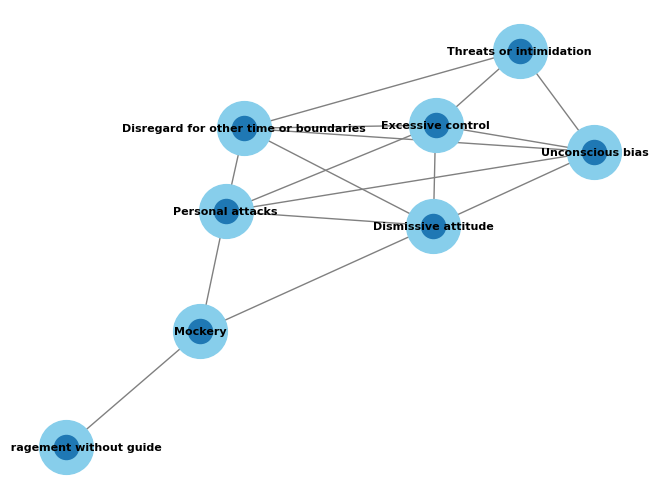

In [17]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', width=1)

nx.draw_networkx_nodes(G, pos)

# Show the plot
plt.show()

In [19]:
unrelatedNodes =['Discouragement without guide',
 'Mockery',
 'Threats or intimidation']
G.remove_nodes_from(unrelatedNodes)

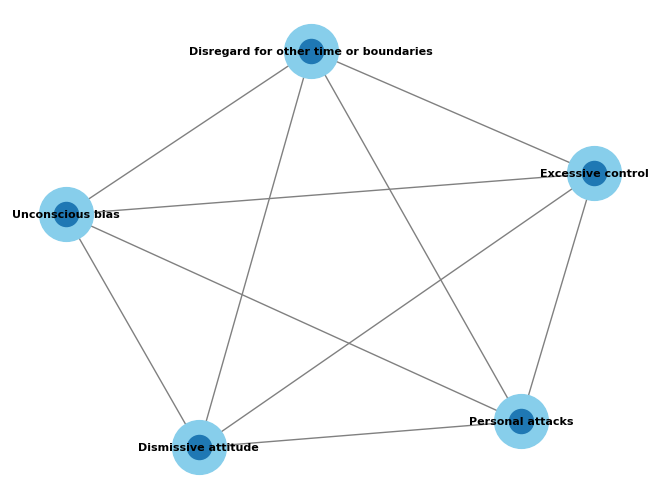

In [21]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1500, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', width=1)

nx.draw_networkx_nodes(G, pos)

# Show the plot
plt.show()